In [3]:
# !pip3 install seaborn matplotlib scikit-learn pandas

In [4]:
import seaborn as sns
import random as rand
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [6]:
train_df = pd.read_csv('Insurance_Cross_Selling/train.csv')
test_df = pd.read_csv('Insurance_Cross_Selling/test.csv')

In [7]:
print(train_df.shape)
print(test_df.shape)

(11504798, 12)
(7669866, 11)


In [8]:
train_df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [9]:
train_df['Response'].value_counts()

Response
0    10089739
1     1415059
Name: count, dtype: int64

In [10]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


Deleting the column id from train and test data

In [11]:
train_df = train_df.drop('id',axis=1)
test_df = test_df.drop('id',axis=1)

In [12]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,11504798.0,38.383563,14.993459,20.0,24.0,36.0,49.0,85.0
Driving_License,11504798.0,0.998022,0.044431,0.0,1.0,1.0,1.0,1.0
Region_Code,11504798.0,26.418690,12.991590,0.0,15.0,28.0,35.0,52.0
Previously_Insured,11504798.0,0.462997,0.498629,0.0,0.0,0.0,1.0,1.0
Annual_Premium,11504798.0,30461.370411,16454.745205,2630.0,25277.0,31824.0,39451.0,540165.0
Policy_Sales_Channel,11504798.0,112.425442,54.035708,1.0,29.0,151.0,152.0,163.0
Vintage,11504798.0,163.897744,79.979531,10.0,99.0,166.0,232.0,299.0
Response,11504798.0,0.122997,0.328434,0.0,0.0,0.0,0.0,1.0


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Gender                object 
 1   Age                   int64  
 2   Driving_License       int64  
 3   Region_Code           float64
 4   Previously_Insured    int64  
 5   Vehicle_Age           object 
 6   Vehicle_Damage        object 
 7   Annual_Premium        float64
 8   Policy_Sales_Channel  float64
 9   Vintage               int64  
 10  Response              int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 965.5+ MB


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Driving_License'}>,
        <Axes: title={'center': 'Region_Code'}>],
       [<Axes: title={'center': 'Previously_Insured'}>,
        <Axes: title={'center': 'Annual_Premium'}>,
        <Axes: title={'center': 'Policy_Sales_Channel'}>],
       [<Axes: title={'center': 'Vintage'}>,
        <Axes: title={'center': 'Response'}>, <Axes: >]], dtype=object)

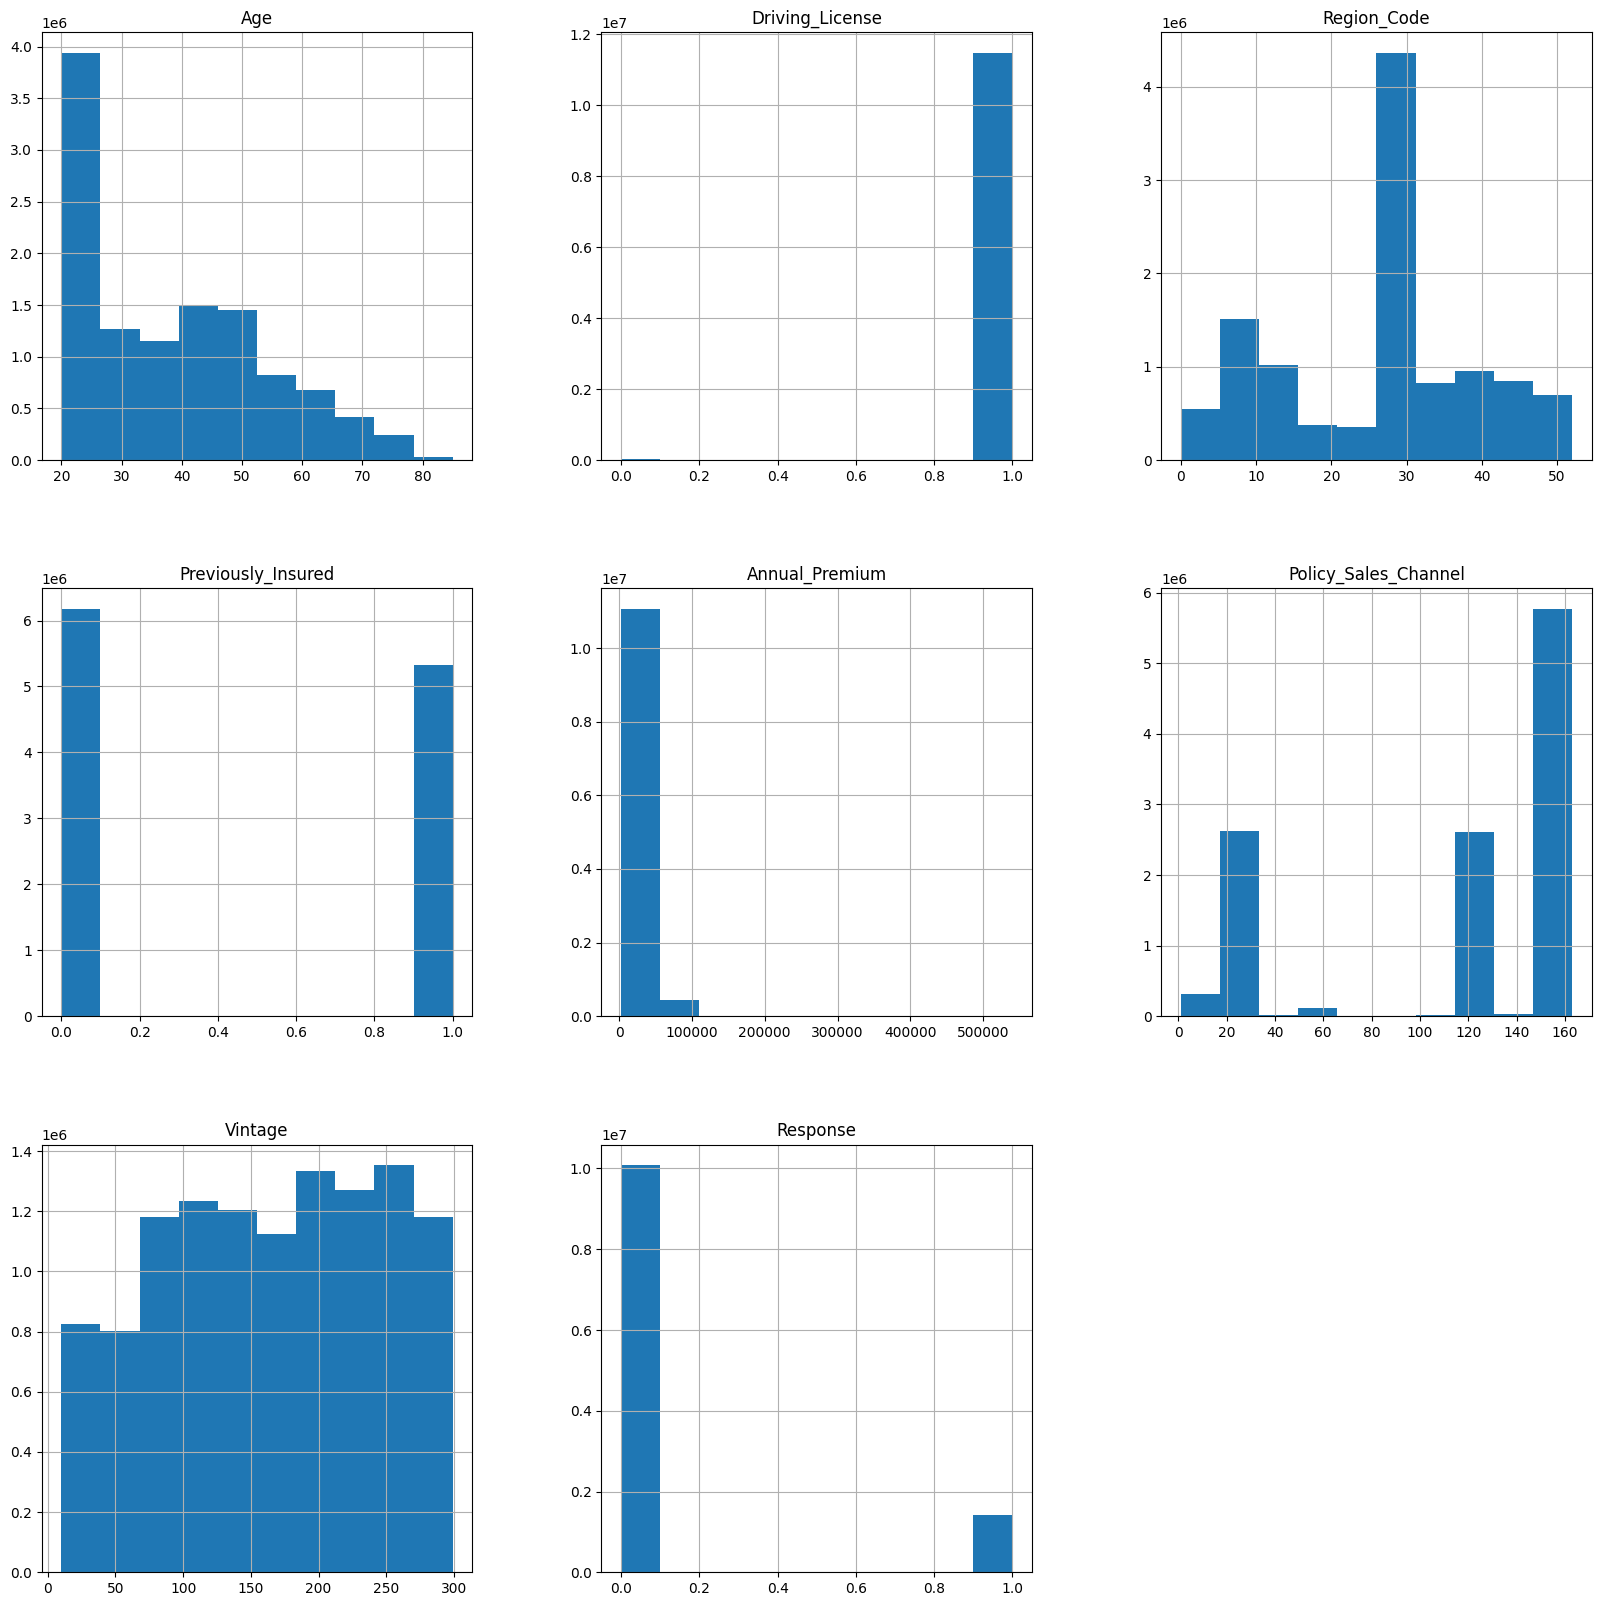

In [14]:
train_df.hist(figsize=(20,20))

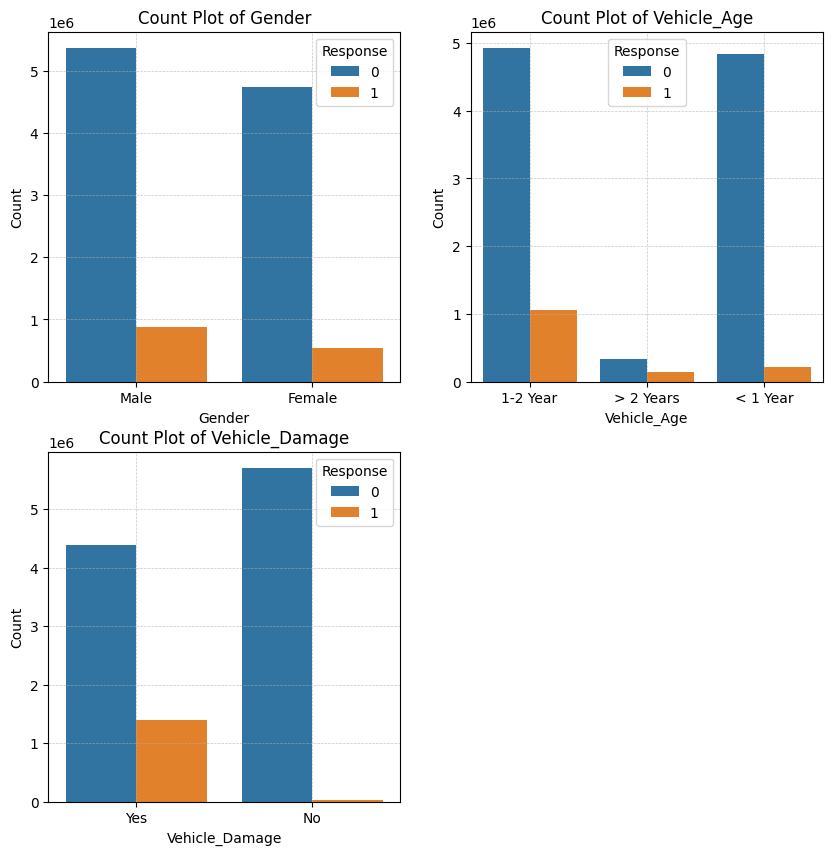

In [15]:
categorical_features = ['Gender','Vehicle_Age','Vehicle_Damage']
plt.figure(figsize=(10,10))

for i, feature in enumerate(categorical_features,1):
    plt.subplot(2,2,i)
    sns.countplot(data=train_df, x=feature, hue='Response')
    plt.grid(True, which='both',linestyle='--',linewidth=0.5,alpha=0.7)
    plt.title(f"Count Plot of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show

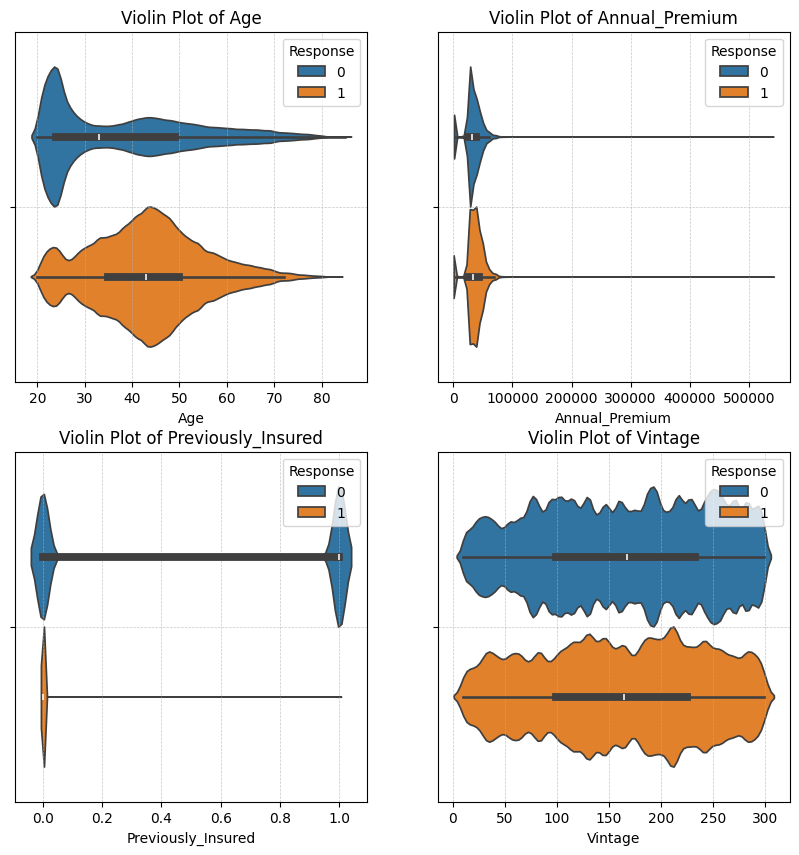

In [16]:
numerical_features = ['Age','Annual_Premium','Previously_Insured','Vintage']
plt.figure(figsize=(10,10))

for i, feature in enumerate(numerical_features,1):
    plt.subplot(2,2,i)
    sns.violinplot(data=train_df, x=feature, hue='Response')
    plt.grid(True, which='both',linestyle='--',linewidth=0.5,alpha=0.7)
    plt.title(f"Violin Plot of {feature}")
    plt.xlabel(feature)
    plt.show

In [17]:
train_df['Vehicle_Age'].value_counts()

Vehicle_Age
1-2 Year     5982678
< 1 Year     5044145
> 2 Years     477975
Name: count, dtype: int64

In [18]:
correlation = train_df[['Driving_License','Response']].corr()
print('*'*7,'Driving_License','*'*7,)
print(correlation)
correlation = train_df[['Annual_Premium','Response']].corr()
print('*'*7,'Annual_Premium','*'*7,)
print(correlation)
correlation = train_df[['Previously_Insured','Response']].corr()
print('*'*7,'Previously_Insured','*'*7,)
print(correlation)
correlation = train_df[['Vintage','Response']].corr()
print('*'*7,'Vintage','*'*7,)
print(correlation)
correlation = train_df[['Policy_Sales_Channel','Response']].corr()
print('*'*7,'Policy_Sales_Channel','*'*7,)
print(correlation)
correlation = train_df[['Region_Code','Response']].corr()
print('*'*7,'Region_Code','*'*7,)
print(correlation)
correlation = train_df[['Age','Response']].corr()
print('*'*7,'Age','*'*7,)
print(correlation)


******* Driving_License *******
                 Driving_License  Response
Driving_License         1.000000  0.009197
Response                0.009197  1.000000
******* Annual_Premium *******
                Annual_Premium  Response
Annual_Premium        1.000000  0.032261
Response              0.032261  1.000000
******* Previously_Insured *******
                    Previously_Insured  Response
Previously_Insured             1.00000  -0.34593
Response                      -0.34593   1.00000
******* Vintage *******
           Vintage  Response
Vintage   1.000000 -0.015177
Response -0.015177  1.000000
******* Policy_Sales_Channel *******
                      Policy_Sales_Channel  Response
Policy_Sales_Channel              1.000000 -0.152733
Response                         -0.152733  1.000000
******* Region_Code *******
             Region_Code  Response
Region_Code     1.000000  0.012816
Response        0.012816  1.000000
******* Age *******
               Age  Response
Age       1.00

Correlation between Driving_License and Response is very low.

In [19]:
train_df['Driving_License'].value_counts()

Driving_License
1    11482041
0       22757
Name: count, dtype: int64

Removing Column Driving License

In [20]:
train_df = train_df.drop('Driving_License',axis=1)
test_df = test_df.drop('Driving_License',axis=1)

creating new features to give weightage to those values which are frequently occuring  

In [21]:
# for Policy Sales Channel

special_channels = train_df['Policy_Sales_Channel'].value_counts().nlargest(2).index

for channel in special_channels:
    new_feature = f"special_channel_{channel}"
    for df in [train_df, test_df]:
        df[new_feature] = (df['Policy_Sales_Channel'] == channel).astype("int8")
        
new_feature = 'special_channels'
for df in [train_df, test_df]:
    df[new_feature] = (df['Policy_Sales_Channel'].isin(special_channels)).astype("int8")

In [22]:
# For Age
new_feature = 'is_young_driver'
for df in [train_df, test_df]:
    df[new_feature] = ((df['Age']>=20) & (df['Age'] < 25)).astype("int8")

new_feature = 'is_old_driver'
for df in [train_df, test_df]:
    df[new_feature] = (df['Age']>61).astype("int8")

In [23]:
# For Region Code
special_region = train_df['Region_Code'].value_counts().nlargest(2).index
new_feature = 'is_special_region'
for df in [train_df, test_df]:
    df[new_feature] = (df['Region_Code'].isin(special_region)).astype("int8")

In [24]:
print(train_df.shape)
train_df.head()

(11504798, 16)


,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,special_channel_152.0,special_channel_26.0,special_channels,is_young_driver,is_old_driver,is_special_region
0,Male,21,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0,0,0,0,1,0,0
1,Male,43,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1,0,1,1,0,0,1
2,Female,25,14.0,1,< 1 Year,No,38043.0,152.0,254,0,1,0,1,0,0,0
3,Female,35,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0,0,0,0,0,0,0
4,Female,36,15.0,1,1-2 Year,No,31951.0,152.0,294,0,1,0,1,0,0,0


In [25]:
print(test_df.shape)
test_df.head()

(7669866, 15)


,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,special_channel_152.0,special_channel_26.0,special_channels,is_young_driver,is_old_driver,is_special_region
0,Female,20,47.0,0,< 1 Year,No,2630.0,160.0,228,0,0,0,1,0,0
1,Male,47,28.0,0,1-2 Year,Yes,37483.0,124.0,123,0,0,0,0,0,1
2,Male,47,43.0,0,1-2 Year,Yes,2630.0,26.0,271,0,1,1,0,0,0
3,Female,22,47.0,1,< 1 Year,No,24502.0,152.0,115,1,0,1,1,0,0
4,Male,51,19.0,0,1-2 Year,No,34115.0,124.0,148,0,0,0,0,0,0


PreProcessing

In [26]:
categorical_features = ['Gender','Vehicle_Age','Vehicle_Damage']
numerical_features = ['Annual_Premium']

In [27]:
categorical_data_train = train_df[categorical_features]
numerical_data_train = train_df[numerical_features]

categorical_data_test = test_df[categorical_features]
numerical_data_test = test_df[numerical_features]

In [28]:
print(categorical_data_train.shape, numerical_data_train.shape,
      categorical_data_test.shape, numerical_data_test.shape)

(11504798, 3) (11504798, 1) (7669866, 3) (7669866, 1)


In [29]:
# Encode categorical_features
encoder = OrdinalEncoder()

# Scale numerical features
scaler = RobustScaler()

In [30]:
encoded_categorical_data = encoder.fit_transform(categorical_data_train)
encoded_categorical_test = encoder.transform(categorical_data_test)

scaled_numerical_data = scaler.fit_transform(numerical_data_train)
scaled_numerical_test = scaler.transform(numerical_data_test)

In [31]:
# encoded_categorical_data, # scaled_numerical_data

train_df['Gender'] = encoded_categorical_data[:,0]
train_df['Vehicle_Age'] = encoded_categorical_data[:,1]
train_df['Vehicle_Damage'] = encoded_categorical_data[:,2]

train_df['Annual_Premium'] = scaled_numerical_data[:,0]

In [32]:
train_df.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,special_channel_152.0,special_channel_26.0,special_channels,is_young_driver,is_old_driver,is_special_region
0,1.0,21,35.0,0,0.0,1.0,2.347749,124.0,187,0,0,0,0,1,0,0
1,1.0,43,28.0,0,2.0,1.0,1.911034,26.0,288,1,0,1,1,0,0,1
2,0.0,25,14.0,1,1.0,0.0,0.438761,152.0,254,0,1,0,1,0,0,0
3,0.0,35,1.0,0,0.0,1.0,-2.059687,156.0,76,0,0,0,0,0,0,0
4,0.0,36,15.0,1,0.0,0.0,0.008960,152.0,294,0,1,0,1,0,0,0


In [33]:
# encoded_categorical_test, # scaled_numerical_test

test_df['Gender'] = encoded_categorical_test[:,0]
test_df['Vehicle_Age'] = encoded_categorical_test[:,1]
test_df['Vehicle_Damage'] = encoded_categorical_test[:,2]

test_df['Annual_Premium'] = scaled_numerical_test[:,0]

In [34]:
test_df.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,special_channel_152.0,special_channel_26.0,special_channels,is_young_driver,is_old_driver,is_special_region
0,0.0,20,47.0,0,1.0,0.0,-2.059687,160.0,228,0,0,0,1,0,0
1,1.0,47,28.0,0,0.0,1.0,0.399252,124.0,123,0,0,0,0,0,1
2,1.0,47,43.0,0,0.0,1.0,-2.059687,26.0,271,0,1,1,0,0,0
3,0.0,22,47.0,1,1.0,0.0,-0.516580,152.0,115,1,0,1,1,0,0
4,1.0,51,19.0,0,0.0,0.0,0.161634,124.0,148,0,0,0,0,0,0


In [35]:
print(train_df.shape)
print(test_df.shape)

(11504798, 16)
(7669866, 15)


#### Save transformed data into csv format to laod it further for training purpose

In [36]:
# train_df.to_csv('Insurance_Cross_Selling/train_transformed.csv',index=False)
print('*'*8)
# test_df.to_csv('Insurance_Cross_Selling/test_transformed.csv',index=False)

********
